## Dataset Visualization

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint


In [7]:
def get_file_counts(path="."):
    
    file_count_dict = {}

    total_file_count = 0  # total files

    for dirpath, dirnames, filenames in os.walk(path):
        file_count, folder_count = len(filenames), len(dirnames)

        total_file_count += file_count
        file_count_dict[dirpath.split('/')[-1]] = file_count

    print ("Total Files in " + path + ": ", total_file_count)
    return file_count_dict

## Dog Images

In [15]:
dog_train_dict = get_file_counts(path="/data/dog_images/train/")
dog_test_dict = get_file_counts(path="/data/dog_images/test/")
dog_valid_dict = get_file_counts(path="/data/dog_images/valid/")

Total Files in /data/dog_images/train/:  6680
Total Files in /data/dog_images/test/:  836
Total Files in /data/dog_images/valid/:  835


In [51]:
# pprint(dog_train_dict)
df_dog_train = pd.DataFrame.from_dict({'filename': list(dog_train_dict.keys()), 
                                      'count': list(dog_train_dict.values())})
df_dog_train = df_dog_train[1:] # remove the column called train
df_dog_train = df_dog_train.sort_values('filename')
df_dog_train.rename(columns = {'filename':'Dog breed'}, inplace = True)
df_dog_train.head(133)

,Dog breed,count
129,001.Affenpinscher,64
73,002.Afghan_hound,58
64,003.Airedale_terrier,52
93,004.Akita,63
21,005.Alaskan_malamute,77
57,006.American_eskimo_dog,64
29,007.American_foxhound,50
101,008.American_staffordshire_terrier,66
71,009.American_water_spaniel,34
67,010.Anatolian_shepherd_dog,50


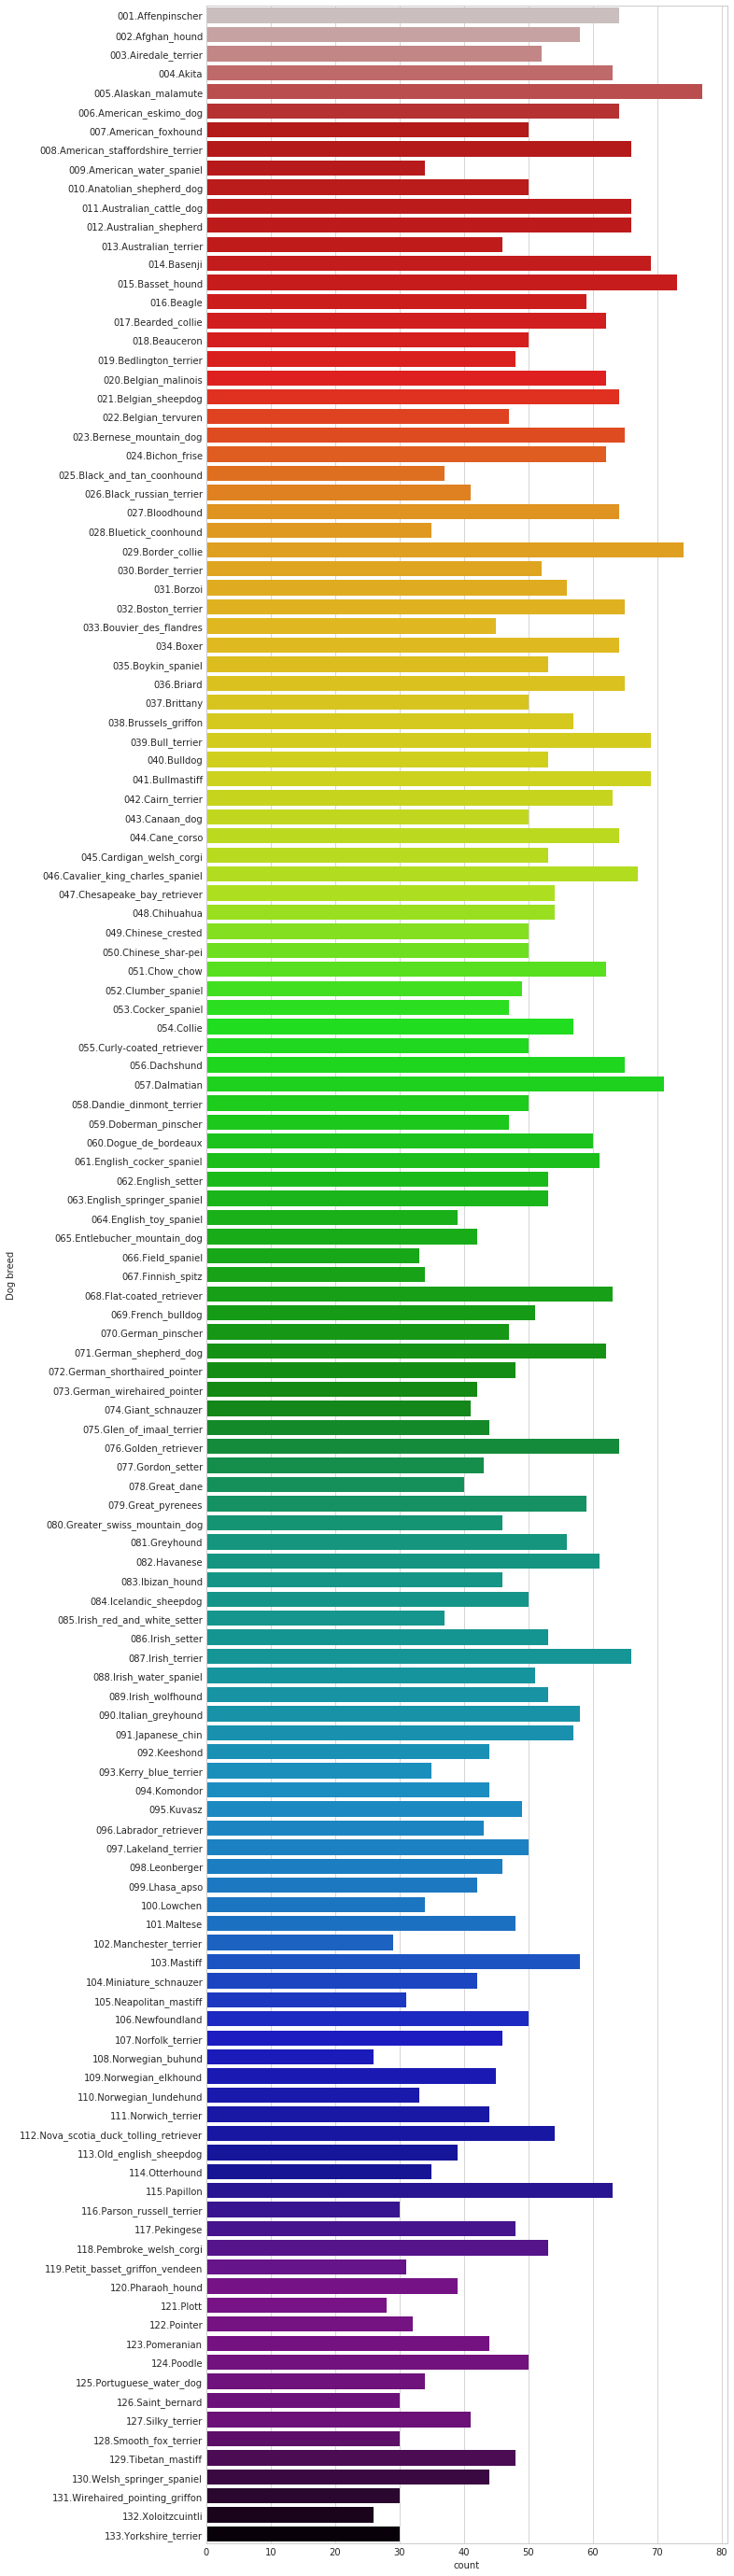

In [55]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 50))

ax = sns.barplot(x="count", y="Dog breed", data=df_dog_train[:],palette = 'nipy_spectral_r')
plt.savefig("dogs_train.png", bbox_inches='tight')